In [11]:
from synutility.SynVis.graph_visualizer import GraphVisualizer
from synutility.SynVis.graph_visualizer import GraphVisualizer
import matplotlib.pyplot as plt
import networkx as nx

from synutility.SynIO.data_type import load_from_pickle

data = load_from_pickle("/home/mark/Documents/graph_theory/ITS_graphs.pkl.gz")

In [31]:
def examine_graph(its_graph):
    print(its_graph.edges)
    print(its_graph.nodes)

    print(its_graph.edges.data())

In [49]:
def get_reaction_center(its_graph):
    reaction_center_edges = [edge for edge in its_graph.edges.data() if edge[2]["standard_order"] != 0]

    reaction_center_nodes = set()

    for start_node, end_node, order_info in reaction_center_edges:
        reaction_center_nodes.add(start_node)
        reaction_center_nodes.add(end_node)

    return nx.induced_subgraph(its_graph, reaction_center_nodes)


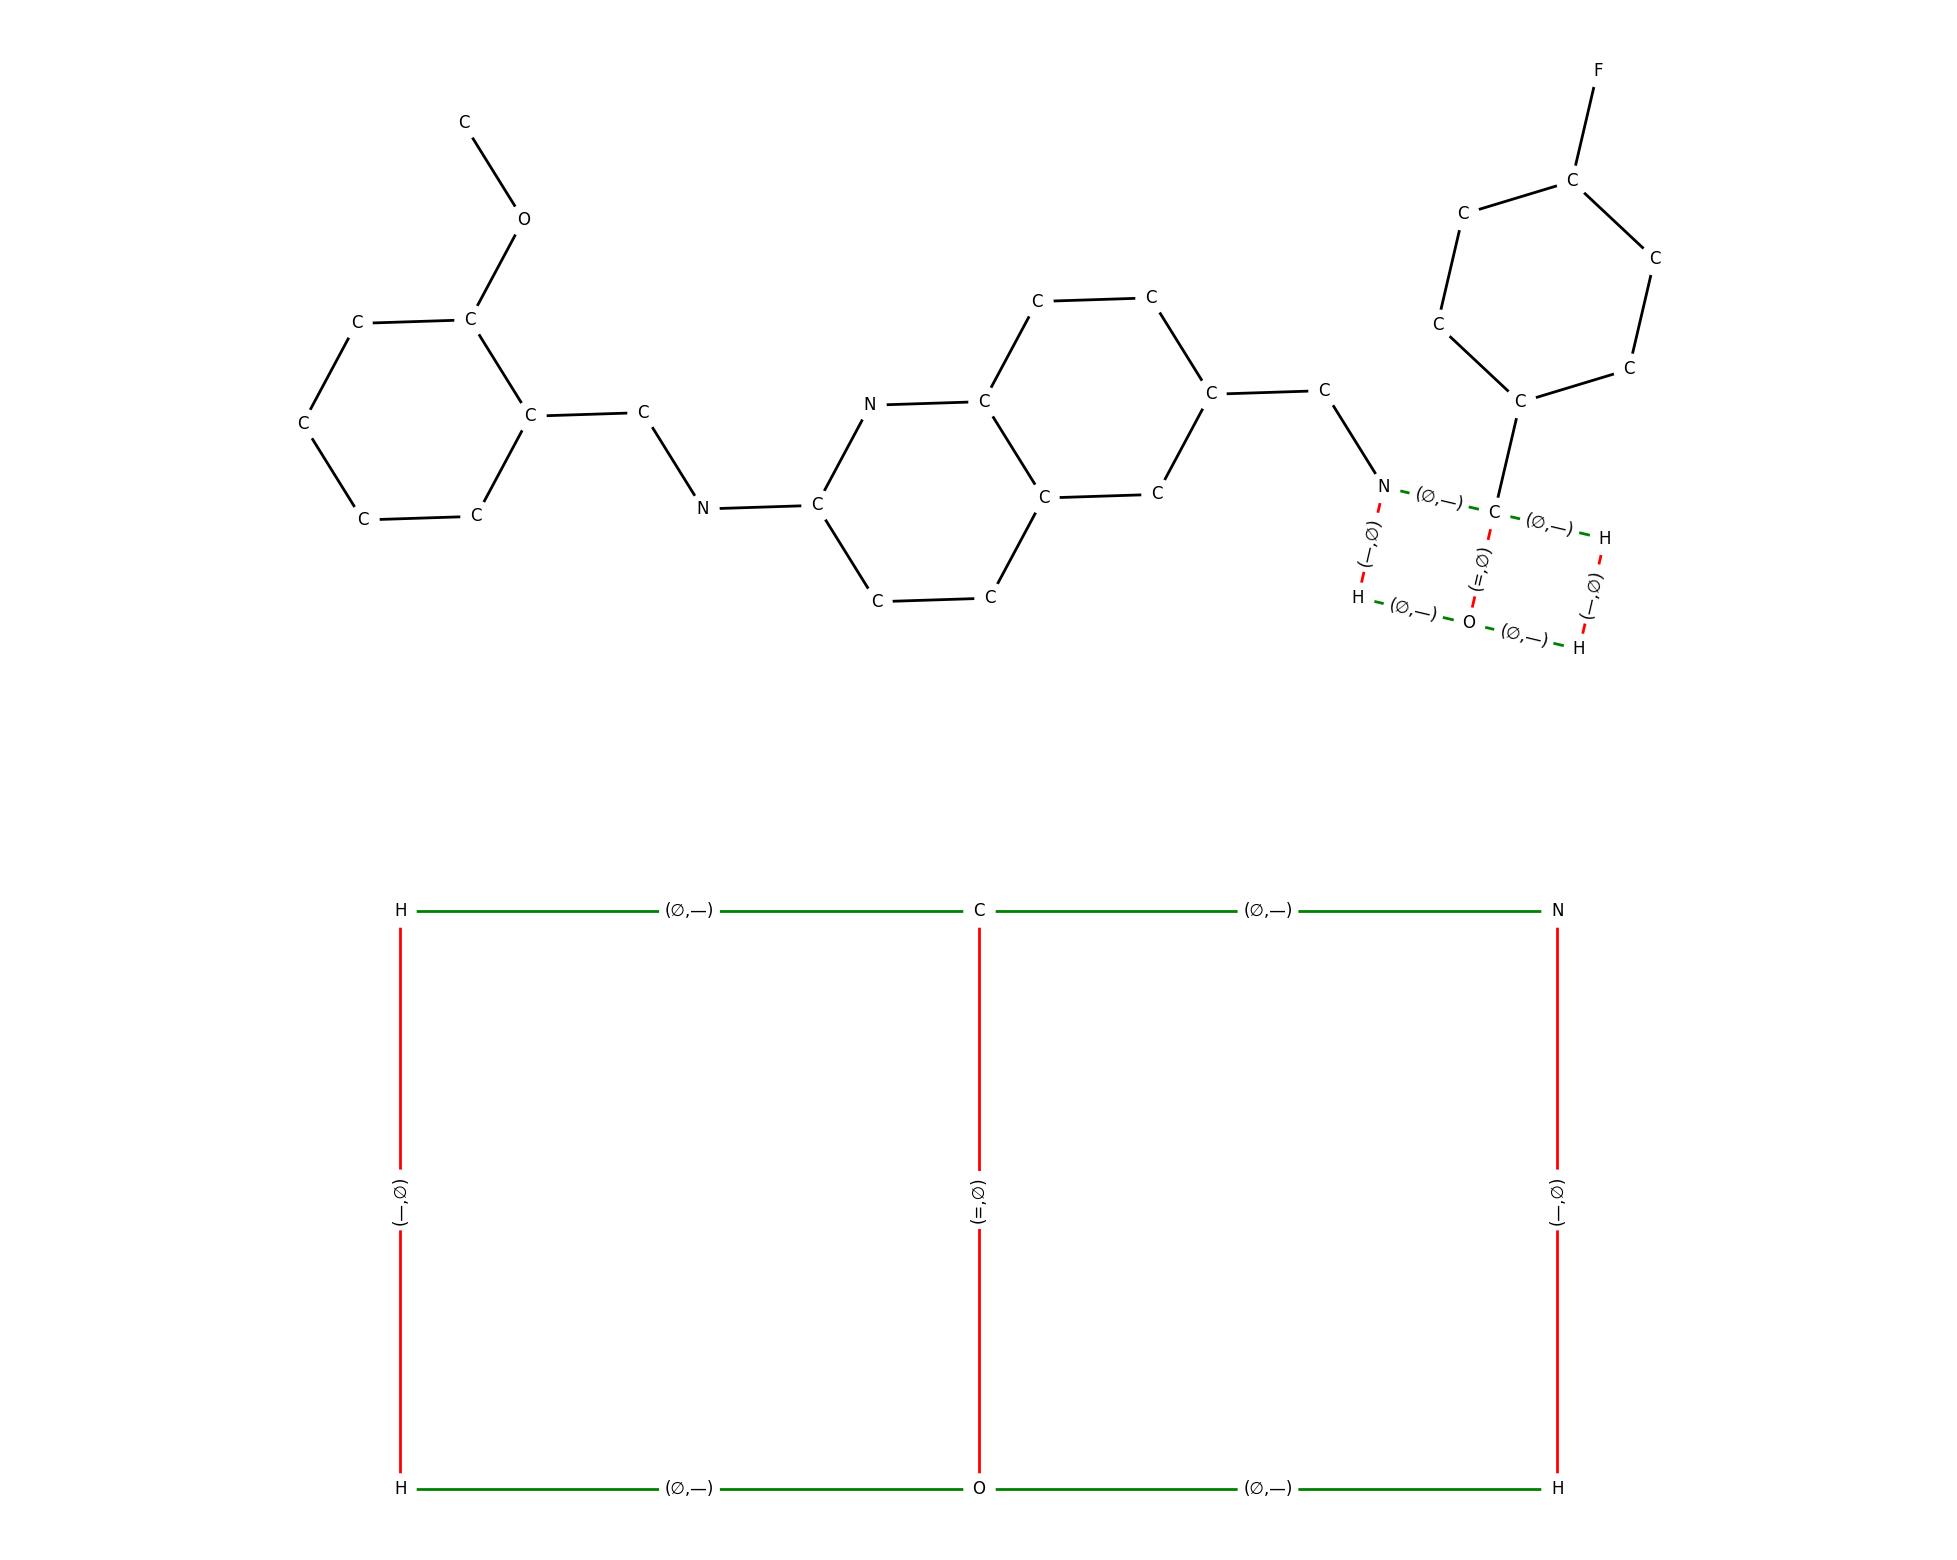

In [54]:
fig, ax = plt.subplots(2, 1, figsize = (25, 20 ))
vis = GraphVisualizer ()

reaction = data[300]

reaction_center = get_reaction_center(reaction["ITS"])

vis.plot_its(reaction["ITS"], ax[0], use_edge_color=True)
vis.plot_its(reaction_center, ax[1], use_edge_color=True)